# Logistic Regression

Task:
Обучить логистическую регрессию. Выбрать из возможных вариантов преобразования признаков и регуляризаций наилучшую модель.
Data = Insulin

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [65]:
# Загрузка данных диабет

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=names)

## EDA

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


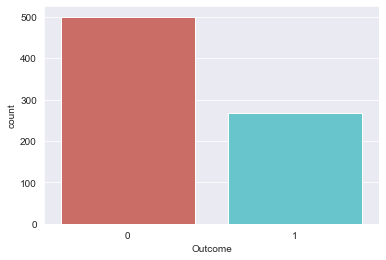

In [68]:
sns.countplot(x='Outcome', data=data, palette='hls')
plt.show()

Классы наших данных не сбалансированы, соотношение пациентов с диабетом и без 65:35.

In [69]:
data.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

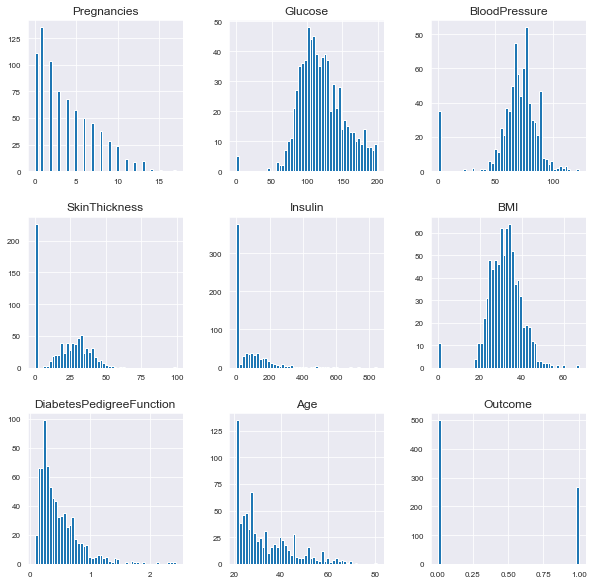

In [70]:
#посмотрим распределение данных
data.hist(xlabelsize=8, ylabelsize=8, figsize=(10, 10), bins=50)
plt.show()

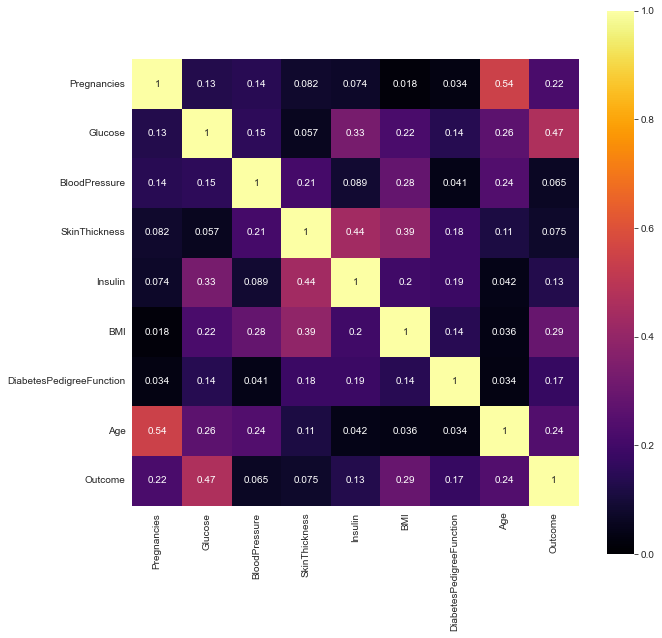

In [71]:
#рассчитаем коллеряцию, чтобы исключить мультиколлинеарность предиктов
corr = data.corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(
    abs(corr),
    vmax=1.0, vmin=0.0,
    annot=True, annot_kws={'size': 10},
    square=True, cmap='inferno'
)
plt.show()

Высокой корреляции не обнаружено (>0.7), есть некоторая взаимосвязь между возрастом и беременностью

## Model_1
В модели учитываем все предикты

In [72]:
# задаем параметры
X1 = data.iloc[::,:8]
y = data['Outcome']

X1, y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [73]:
logit_model=sm.Logit(y,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.059     
Dependent Variable:    Outcome            AIC:                950.6528  
Date:                  2023-07-21 20:28   BIC:                987.8031  
No. Observations:      768                Log-Likelihood:     -467.33   
Df Model:              7                  LL-Null:            -496.74   
Df Residuals:          760                LLR p-value:        2.5825e-10
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1284   0.0286  4.4843 0

Часть предиктов являются статистически незначимыми по отношению к нашей независимой переменной (p > 0.05).

In [74]:
# Разделение данных на обучающий и тестовый наборы
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [75]:
X1_train.mean(axis=0), X1_train.std(axis=0)

(Pregnancies                   3.742671
 Glucose                     120.855049
 BloodPressure                69.415309
 SkinThickness                20.399023
 Insulin                      81.438111
 BMI                          31.983388
 DiabetesPedigreeFunction      0.469168
 Age                          32.907166
 dtype: float64,
 Pregnancies                   3.313264
 Glucose                      32.035057
 BloodPressure                18.512599
 SkinThickness                15.433974
 Insulin                     116.234835
 BMI                           7.740625
 DiabetesPedigreeFunction      0.336847
 Age                          11.503437
 dtype: float64)

In [76]:
# Нормализация данных
scaler = StandardScaler().fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)
X1_train.mean(axis=0), X1_train.std(axis=0)

(array([ 1.73585359e-17, -2.16981699e-17,  6.94341436e-17,  1.04151215e-16,
        -2.60378038e-17, -5.69938595e-16,  1.56226823e-16, -3.76101611e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [77]:
# Создание экземпляра модели и её обучение
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model.fit(X1_train, y_train)

LogisticRegression(solver='liblinear')

In [78]:
# коэффициенты
model.coef_, model.intercept_

(array([[ 0.21198421,  1.0692128 , -0.24724324,  0.04563169, -0.20074365,
          0.77544936,  0.23055409,  0.41957156]]),
 array([-0.87581424]))

In [79]:
# экспонента коэффициентов
np.exp(model.coef_)

array([[1.23612837, 2.91308542, 0.78095071, 1.04668883, 0.81812213,
        2.17156772, 1.25929758, 1.52130963]])

In [80]:
# Предсказание на тестовом наборе данных
y_pred = model.predict(X1_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X1_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [81]:
# Построим матрицу путаницы [TP FP] // [FN TN]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[79 20]
 [18 37]]


In [82]:
# Результат модели_1
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



## Model_2
Исключим из модели статистически незначимые предикты (p > 0.05)

In [85]:
X2 = data.iloc[::,:3]
y = data['Outcome']

X2, y

(     Pregnancies  Glucose  BloodPressure
 0              6      148             72
 1              1       85             66
 2              8      183             64
 3              1       89             66
 4              0      137             40
 ..           ...      ...            ...
 763           10      101             76
 764            2      122             70
 765            5      121             72
 766            1      126             60
 767            1       93             70
 
 [768 rows x 3 columns],
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64)

In [86]:
logit_model=sm.Logit(y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.613118
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.052     
Dependent Variable: Outcome          AIC:              947.7495  
Date:               2023-07-21 20:37 BIC:              961.6808  
No. Observations:   768              Log-Likelihood:   -470.87   
Df Model:           2                LL-Null:          -496.74   
Df Residuals:       765              LLR p-value:      5.8346e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pregnancies        0.0951   0.0238  3.9956 0.0001  0.0484  0.1417
Glucose            0.0122   0.0021  5.8041 0.0000  0.0081  0.0163


In [87]:
# Разделение данных на обучающий и тестовый наборы
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)
X2_train.mean(axis=0), X2_train.std(axis=0)

(array([ 1.73585359e-17, -2.16981699e-17,  6.94341436e-17]),
 array([1., 1., 1.]))

In [88]:
# Создание экземпляра модели и её обучение
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model.fit(X2_train, y_train)

LogisticRegression(solver='liblinear')

In [89]:
# экспонента коэффициентов
np.exp(model.coef_)

array([[1.43516193, 3.15943819, 0.96316122]])

In [90]:
# Предсказание на тестовом наборе данных
y_pred_2 = model.predict(X2_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X2_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_2)
print(confusion_matrix)

[[86 13]
 [22 33]]


In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



## Результаты

Точность (accuracy) второй модели оказалась выше (модель_1 - 75%, модель_2 - 77%).

Способность модели_1 найти все истинные примеры (recall): пациентов без диабета составила 80%, пациентов с диабетом - 67%.
Способность модели_2 найти все истинные примеры (recall): пациентов без диабета составила 87%, пациентов с диабетом - 60%.

Точность (precision) модели_1 по пациентам без диабета 81%, с диабетов - 65%.
Точность (precision) модели_2 по пациентам без диабета 80%, с диабетов - 72%.